In [1]:
%matplotlib inline

In [2]:
import logisticRegression as lr

import matplotlib.pyplot as plt
import numpy as np

# Generate Some Data

In [3]:
trainDataSize = 2000
crossValidateDataSize = 500

trainSet = np.random.multivariate_normal([4.5,4.5], [[1,0.4],[0.4,1]], trainDataSize)
crossValidateSet = np.random.multivariate_normal([4.5,4.5], [[1,0.4],[0.4,1]], crossValidateDataSize)

print(trainSet.shape)
print(crossValidateSet.shape)

(2000, 2)
(500, 2)


 
0.4216 x + 2.626


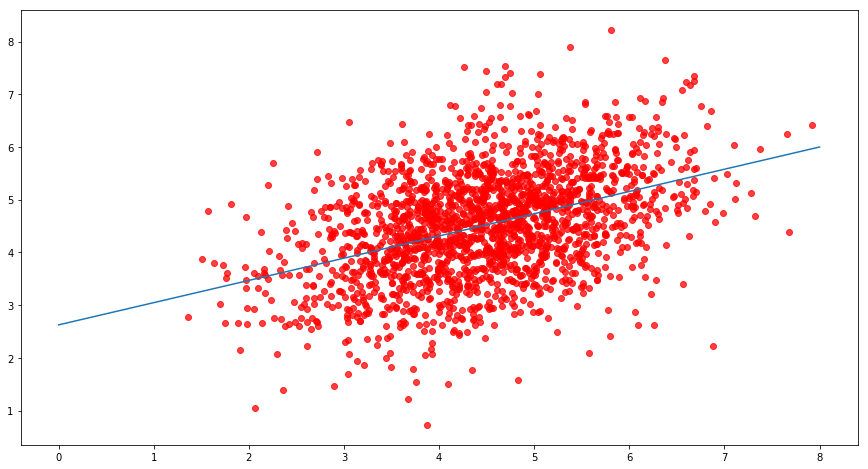

In [4]:
plt.figure(figsize=(15,8))

plt.scatter(trainSet[:,0], trainSet[:,1], color='r', alpha =0.75)

# Find a good decision boundary
linetestx = np.linspace(0, 8, 10)
fit = np.polyfit(trainSet[:,0], trainSet[:,1],1)
fit_fn = np.poly1d(fit)
print(fit_fn)

plt.plot(linetestx, fit_fn(linetestx))

In [5]:
# y = 0.3994x + 2.699
# 0 = (0.3994)x + (-1.0)y + (2.699)
# these are our "ideal" thetas

# Classifying the Data 

In [6]:
thetaX_ideal = 0.3994
thetaY_ideal = -1.0
theta0_ideal = 2.699

trainLabels = np.zeros(len(trainSet))
crossValidateLabels = np.zeros(len(crossValidateSet))

for i in range(len(trainSet)):
    classification = thetaX_ideal*trainSet[i][0] + thetaY_ideal*trainSet[i][1] + theta0_ideal
    
    if classification >= 0.0:
        trainLabels[i] = 1.0
    else:
        trainLabels[i] = 0.0
        
for j in range(len(crossValidateSet)):
    classification = thetaX_ideal*crossValidateSet[j][0] + thetaY_ideal*crossValidateSet[j][1] + theta0_ideal
    
    if classification >= 0.0:
        crossValidateLabels[j] = 1.0
    else:
        crossValidateLabels[j] = 0.0
        
print("Training - Num Above: " + str(int(trainLabels.sum())) + " & Num Below: " + str(int(len(trainLabels) - trainLabels.sum())) ) 
print("Cross Validation - Num Above: " + str(int(crossValidateLabels.sum())) + " & Num Below: " + str(int(len(crossValidateLabels) - crossValidateLabels.sum())) )  

Training - Num Above: 967 & Num Below: 1033
Cross Validation - Num Above: 260 & Num Below: 240


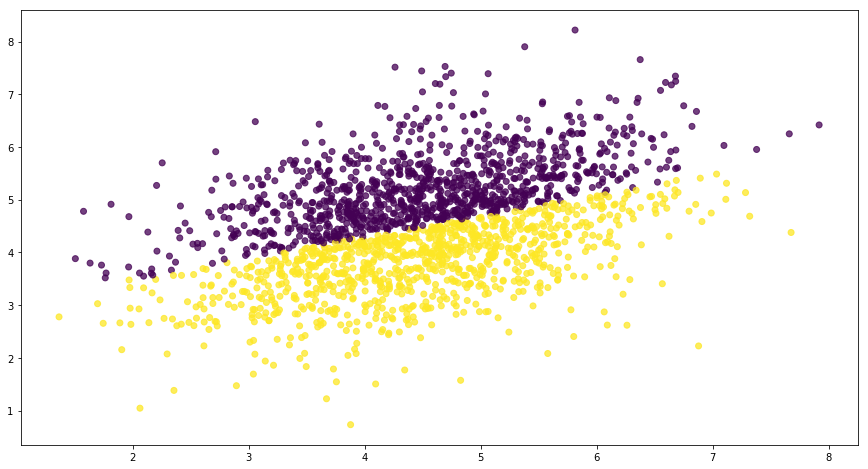

In [7]:
plt.figure(figsize=(15,8))

plt.scatter(trainSet[:,0], trainSet[:,1], c=trainLabels, alpha =0.75)

# Implementing Logistic Regression

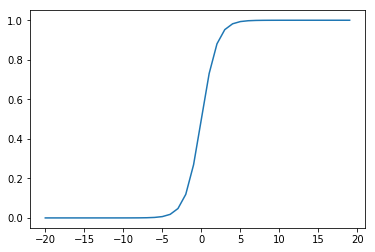

In [8]:
xArray = np.arange(-20,20, step=1)
plt.plot(xArray, lr.sigmoid(xArray))

In [9]:
#We will have a vector array of theta coefficients, an array of x's/features (will be feature x) 
#and an array of y (actual suvived values)

In [10]:
#features/x's
someFeatures = np.array(trainSet)
someCVFeatures = np.array(crossValidateSet)

#adding column of ones 
constantCol = np.ones((len(someFeatures),1))
constantCVCol = np.ones((len(someCVFeatures), 1))
features = np.hstack((someFeatures, constantCol))
cvFeatures = np.hstack((someCVFeatures, constantCVCol))


#parameters/thetas
thetas = np.zeros((3,1))

#classes/y's
labels = np.array(trainLabels, ndmin=2).T

cvLabels = np.array(crossValidateLabels, ndmin=2).T


print("Training Set Shape: " + str(features.shape))
print("Cross Validation Set Shape: " + str(cvFeatures.shape))

print("Theta Set Shape: " + str(thetas.shape))

print("Training Labels Set Shape: " + str(labels.shape))
print("Cross Validation Labels Set Shape: " + str(cvLabels.shape))

Training Set Shape: (2000, 3)
Cross Validation Set Shape: (500, 3)
Theta Set Shape: (3, 1)
Training Labels Set Shape: (2000, 1)
Cross Validation Labels Set Shape: (500, 1)


In [11]:
alpha = 0.05
minCostDif = 1e-7
maxIterations = 100000
lr.gradientDescent(features, thetas, labels, alpha, minCostDif, maxIterations, cvFeatures, cvLabels)

Accuracy at 5000 Iterations: 0.934
Accuracy at 10000 Iterations: 0.952
Accuracy at 15000 Iterations: 0.956
Accuracy at 20000 Iterations: 0.966
Accuracy at 25000 Iterations: 0.974
Accuracy at 30000 Iterations: 0.974
Accuracy at 35000 Iterations: 0.974
Accuracy at 40000 Iterations: 0.976
Accuracy at 45000 Iterations: 0.978
Accuracy at 50000 Iterations: 0.978
Accuracy at 55000 Iterations: 0.98
Accuracy at 60000 Iterations: 0.98
Accuracy at 65000 Iterations: 0.98
Accuracy at 70000 Iterations: 0.982
Accuracy at 75000 Iterations: 0.982
Accuracy at 80000 Iterations: 0.984
Accuracy at 85000 Iterations: 0.986
Accuracy at 90000 Iterations: 0.986
Accuracy at 95000 Iterations: 0.988
Accuracy at 100000 Iterations: 0.988
Complete...
Iterations: 100000
Current Cost Function Evaluation: 0.067737698755
Current Cost Difference Between Last Iterations: 2.56943884225e-07


array([[  4.5491292 ],
       [-10.63483652],
       [ 27.31048424]])

In [15]:
logRegLabels = np.zeros(len(trainSet))

for i in range(len(trainSet)):
    classification = thetas[0,0]*trainSet[i][0] + thetas[1,0]*trainSet[i][1] + thetas[2,0]
    
    if classification >= 0.0:
        logRegLabels[i] = 1.0
    else:
        logRegLabels[i] = 0.0

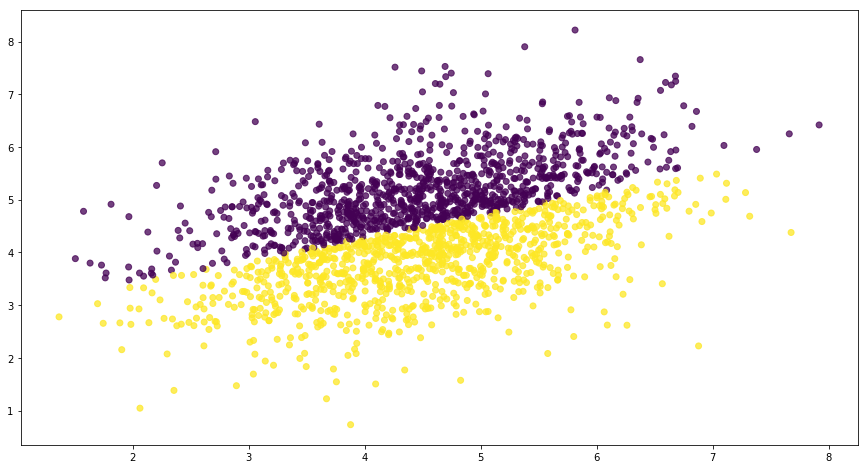

In [16]:
plt.figure(figsize=(15,8))

plt.scatter(trainSet[:,0], trainSet[:,1], c=logRegLabels, alpha =0.75)